## Algorithmique - Tri

Dans ce TP/TD, on cherche à comparer les performances de 3 algorithmes de tri : tri à bulle, tri par insertion, tri rapide.
    

### Préparation des données
Dans cette cellule préliminaire, on créée une liste aléatoire de $N$ nombres entiers choisis entre $0$ et $N-1$.

In [35]:
N = 20

import random
# création d'une liste ordonnée de 0 à N-1
list_to_sort = list(range(N))
# on mélange la liste (mélanger au sens de mélanger un jeu de cartes, "shuffle" en anglais)
random.shuffle(list_to_sort)
print(f"Liste de {N} entiers à trier: {list_to_sort}")

Liste de 20 entiers à trier: [17, 5, 1, 10, 9, 12, 3, 15, 4, 18, 11, 2, 8, 0, 14, 13, 16, 7, 19, 6]


## Tri par insertion
On donne ci-dessous, en pseudo-code, l'algorithme du tri par insertion.
```bash
POUR (i allant de 0 à n-1) FAIRE
	valeur ← liste[i]
	j ← i
	TANTQUE ( j > 0 et liste[j-1] > valeur) FAIRE
		liste[j] ← liste[j-1]
		j ← j-1
	FIN TANTQUE
	liste[j] ← valeur
FIN POUR
```

### Question 1. 
Implémenter l'algorithme précédent dans une fonction `tri_insertion` qui retourne la liste triée. 

In [36]:
def tri_insertion(input_list):
    liste = input_list.copy()
    nb_operations = 0
    for i in range(len(liste)):
        valeur = liste[i]
        j = i
        nb_operations += 2
        while j > 0 and liste[j-1] > valeur:
            liste[j] = liste[j-1]
            j = j - 1
            nb_operations += 2
        liste[j] = valeur
        nb_operations += 1
    return liste, nb_operations

# vérification
tri_insertion(list_to_sort)[0]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

### Question 2.
Programmer une fonction `test_tri_insertion` qui vérifie que le tri a bien été effectué, c'est-à-dire que chaque élément de la liste est inférieur ou égal à son successeur.

In [37]:
def test_tri_insertion():
    sorted_list = tri_insertion(list_to_sort)[0]
    for i in range(len(sorted_list) - 1):  # attention, on ne va pas jusqu'au bout
        assert sorted_list[i] <= sorted_list[i + 1]
test_tri_insertion()

### Question 3.
Modifier la fonction `tri_insertion` pour qu'elle retourne, en plus de la liste triée, le nombre d'opérations qui ont été nécessaires (additions, soustractions, multplications, divisions, affectations).

### Question 4.
Tracer sur un graphique l'évolution du nombre d'opérations nécessaires pour faire le tri par insertion d'une liste de N entiers pour N allant de 100 à 1000 par pas de 10.

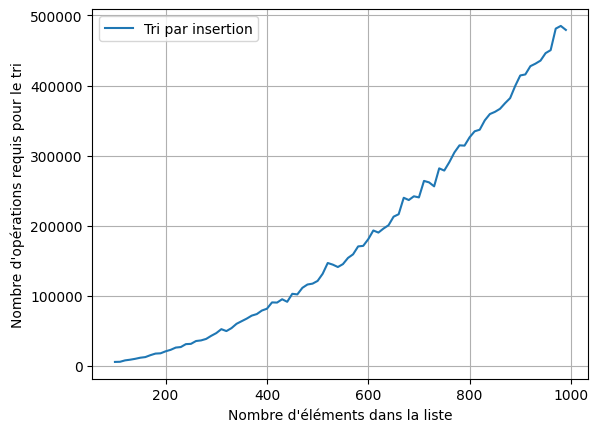

In [38]:
import matplotlib.pyplot as plt

liste_N = range(100, 1000, 10)
nb_ope_insertion = []

for N in liste_N:
    liste_a_trier = list(range(N))
    random.shuffle(liste_a_trier)
    nb_ope_insertion.append(tri_insertion(liste_a_trier)[1])

plt.plot(liste_N, nb_ope_insertion, label="Tri par insertion")
plt.xlabel("Nombre d'éléments dans la liste")
plt.ylabel("Nombre d'opérations requis pour le tri")
plt.legend()
plt.grid()
plt.show()

## Tri à bulles
On donne ci-dessous, en pseudo-code, l'algorithme du tri à bulles.
```bash
echange_en_cours ← VRAI
TANTQUE (echange_en_cours = VRAI) FAIRE
	echange_en_cours ← FAUX
	POUR j de 0 à n-2 FAIRE
		SI liste[j] > liste[j + 1] ALORS
			échanger liste[j] et liste[j + 1]
			echange_en_cours ← VRAI
		FIN SI
	FIN POUR
FIN TANTQUE
```

### Question 5.
Effectuer le même travail que pour le tri par insertion, jusqu'au tracé du graphique.

In [39]:
# tout d'abord, je programme la fonction qui permet d'effectuer le tri conformément à l'algorithme ci-dessus.
def tri_a_bulles(input_list):
    liste = input_list.copy()
    nb_operations = 0
    echange_en_cours = True
    while echange_en_cours:
        echange_en_cours = False
        for j in range(len(liste) - 1):
            nb_operations += 1
            if liste[j] > liste[j + 1]:
                # avec python, le swap de deux variables a et b
                # se fait avec l'instruction
                # a, b = b, a
                liste[j], liste[j + 1] = liste[j + 1], liste[j]
                echange_en_cours = True
                nb_operations += 3
    return liste, nb_operations

# vérification
tri_a_bulles([6, 5, 7, 3, 1, 2])[0]

[1, 2, 3, 5, 6, 7]

In [40]:
# fonction de test
def test_tri_a_bulles():
    sorted_list = tri_a_bulles(list_to_sort)[0]
    for i in range(len(sorted_list) - 1):  # attention, on ne va pas jusqu'au bout
        assert sorted_list[i] <= sorted_list[i + 1]
test_tri_a_bulles()

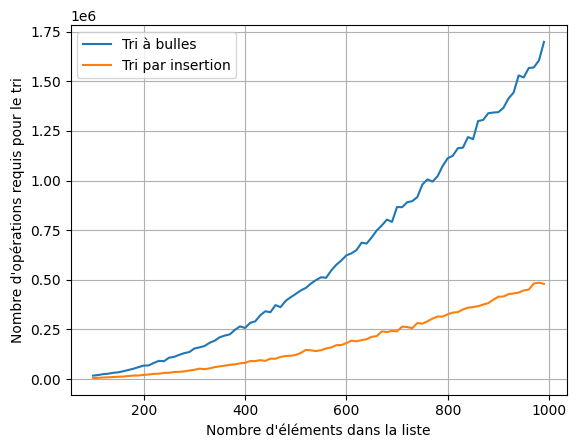

In [41]:
# le graphique pour les mêmes valeurs de N, en traçant aussi le tri par insertion

liste_N = range(100, 1000, 10)
nb_ope_bulles = []

for N in liste_N:
    liste_a_trier = list(range(N))
    random.shuffle(liste_a_trier)
    nb_ope_bulles.append(tri_a_bulles(liste_a_trier)[1])

plt.plot(liste_N, nb_ope_bulles, label="Tri à bulles")
plt.plot(liste_N, nb_ope_insertion, label="Tri par insertion")
plt.xlabel("Nombre d'éléments dans la liste")
plt.ylabel("Nombre d'opérations requis pour le tri")
plt.legend()
plt.grid()
plt.show()

## Tri rapide
Enfin, on donne l'algorithme en pseudo-code d'un troisième algorithme de tri, connu sous le nom de tri rapide ou quick sort.
```bash

SI nombre_d_element_de_liste = 0 FAIRE:
    RENVOYER LISTE

pivot ← liste[0]

POUR i de 0 à n-1 FAIRE
    liste_plus_petit ← []
    liste_plus_grand ← []
    POUR i de 1 à n:
        SI liste[i] <= pivot FAIRE
            AJOUTER liste[i] à liste_plus_petit
        SINON FAIRE
            AJOUTER liste[i] à liste_plus_grand
        FIN_SI
    APPLIQUER RECURSIVEMENT TRI_RAPIDE sur liste_plus_petit
    APPLIQUER RECURSIVEMENT TRI_RAPIDE sur liste_plus_grand
    CONCATENER les deux listes
    RENVOYER CETTE LISTE
FIN POUR
```

### Question 6.
Reprendre le travail précédent pour ce nouvel algorithme de tri.

In [42]:
def tri_rapide(input_list):
    if len(input_list) == 0:
        return input_list, 0

    nb_operations = 0

    pivot = input_list[0]
    
    liste_plus_petit = []
    liste_egal = [pivot]
    liste_plus_grand = []

    for i in range(1, len(input_list)):
        elem = input_list[i]
        nb_operations += 1
        if elem < pivot:
            liste_plus_petit.append(elem)
            nb_operations += 2 # une comparaison et une affectation
        elif elem > pivot:
            liste_plus_grand.append(elem)
            nb_operations += 3 # deux comparaisons et une affectation
        else:
            liste_egal.append(elem)
            nb_operations += 3 # deux comparaisons et une affectation
    
    liste_plus_petit_triee, nb_1 = tri_rapide(liste_plus_petit)
    liste_plus_grand_triee, nb_2 = tri_rapide(liste_plus_grand)
    
    liste_finale = liste_plus_petit_triee + liste_egal + liste_plus_grand_triee
    
    nb_op = nb_1 + nb_2 + nb_operations
    return liste_finale, nb_operations

# vérification
tri_rapide([11, 12, 8, 7, 10, 8, 9])

([7, 8, 8, 9, 10, 11, 12], 19)

In [43]:
# fonction de test
def test_tri_rapide():
    sorted_list = tri_rapide(list_to_sort)[0]
    for i in range(len(sorted_list) - 1):  # attention, on ne va pas jusqu'au bout
        assert sorted_list[i] <= sorted_list[i + 1]
test_tri_rapide()

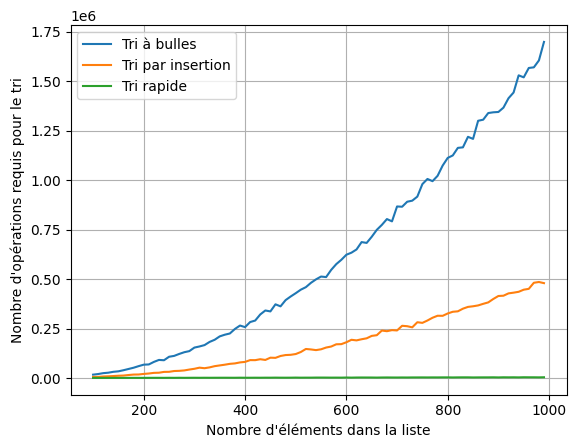

In [44]:
# finalement, on trace le graphique avec la comparaison des 3 algorithmes
# le graphique pour les mêmes valeurs de N, en traçant aussi le tri par insertion
liste_N = range(100, 1000, 10)
nb_ope_rapide = []

for N in liste_N:
    liste_a_trier = list(range(N))
    random.shuffle(liste_a_trier)
    nb_ope_rapide.append(tri_rapide(liste_a_trier)[1])

plt.plot(liste_N, nb_ope_bulles, label="Tri à bulles")
plt.plot(liste_N, nb_ope_insertion, label="Tri par insertion")
plt.plot(liste_N, nb_ope_rapide, label="Tri rapide")
plt.xlabel("Nombre d'éléments dans la liste")
plt.ylabel("Nombre d'opérations requis pour le tri")
plt.legend()
plt.grid()
plt.show()

## Complexité algorithmique

### Question 8.
Déterminer la complexité algorithmique des 3 algorithmes précédents. Vous porterez, sur le graphique, un majorant pour justifier votre réponse.



La complexité algorithmique des tri par insertion et tri à bulle est une complexité quadratique $O(n^2)$. Justification sur le graphique ci-dessous.

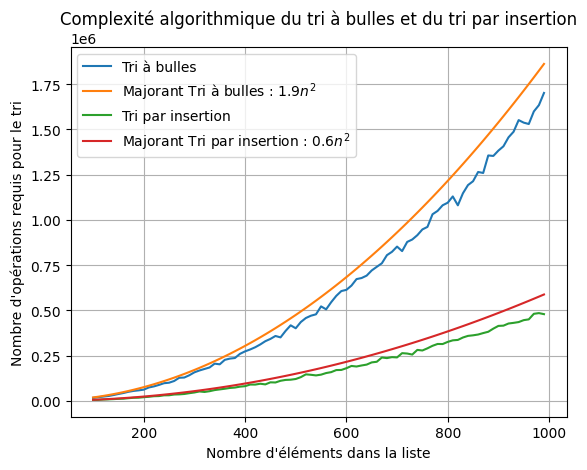

In [63]:
# le graphique pour les mêmes valeurs de N, en traçant aussi le tri par insertion
import numpy as np

liste_N = np.array(range(100, 1000, 10))

plt.plot(liste_N, nb_ope_bulles, label="Tri à bulles")
plt.plot(liste_N, 1.9 * liste_N ** 2, label="Majorant Tri à bulles : $1.9n^2$")
plt.plot(liste_N, nb_ope_insertion, label="Tri par insertion")
plt.plot(liste_N, 0.6 * liste_N ** 2, label="Majorant Tri par insertion : $0.6n^2$")

plt.xlabel("Nombre d'éléments dans la liste")
plt.ylabel("Nombre d'opérations requis pour le tri")
plt.title("Complexité algorithmique du tri à bulles et du tri par insertion")
plt.legend()
plt.grid()
plt.show()

La complexité pour l'algorithme du tri rapide est $O(nlog(n))$. Je le représente sur un autre graphique.

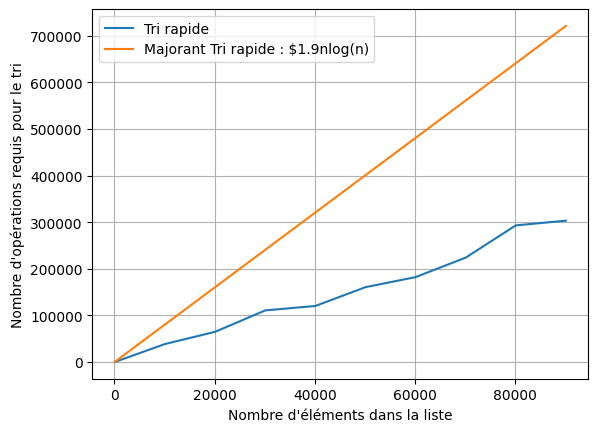

In [95]:
# finalement, on trace le graphique avec la comparaison des 3 algorithmes
# le graphique pour les mêmes valeurs de N, en traçant aussi le tri par insertion
liste_N = np.array(range(100, 100000, 10000))

nb_ope_rapide = []

for N in liste_N:
    liste_a_trier = list(range(N))
    random.shuffle(liste_a_trier)
    nb_ope_rapide.append(tri_rapide(liste_a_trier)[1])
    
plt.plot(liste_N, nb_ope_rapide, label="Tri rapide")
plt.plot(liste_N, 8 * liste_N, label="Majorant Tri rapide : $1.9nlog(n)")
plt.xlabel("Nombre d'éléments dans la liste")
plt.ylabel("Nombre d'opérations requis pour le tri")
plt.legend()
plt.grid()
plt.show()

## Prévision du temps de calcul
On doit trier une d'un milliard d'entiers (c'est-à-dire $10^9$ entiers). Avant de se lancer dans cette tâche, nous allons prévoir le temps requis pour le faire, avec chacun des algorithmes.

### Question 9.
Pour chacun des algorithmes, mesurer le temps moyen nécessaire pour trier une liste de 100000 ($10^4$) entiers.

In [83]:
liste_a_trier = liste_a_trier = list(range(10000))
random.shuffle(liste_a_trier)

import time
t0 = time.perf_counter()
tri_a_bulles(liste_a_trier)
t1 = time.perf_counter()
print(f"Temps nécessaire pour trier 10**4 entiers avec tri à bulles : {t1 - t0:.2f}s")
tri_insertion(liste_a_trier)
t2 = time.perf_counter()
print(f"Temps nécessaire pour trier 10**4 entiers avec tri par insertion : {t2 - t1:.2f}s")
tri_rapide(liste_a_trier)
t3 = time.perf_counter()
print(f"Temps nécessaire pour trier 10**4 entiers avec tri rapide : {t3 - t2:.2f}s")

Temps nécessaire pour trier 10**5 entiers avec tri à bulles : 23.88s
Temps nécessaire pour trier 10**5 entiers avec tri par insertion : 7.65s
Temps nécessaire pour trier 10**5 entiers avec tri rapide : 0.04s


### Question 10.
Compte tenu de la complexité de chaque algorithme, déterminer, par extrapolation à partir des résultats précédents, le temps nécessaire pour effectuer le tri d'une liste de $10^{9}$ entiers. On demande un ordre de grandeur.

Réponse:
* pour le tri à bulles : $t = 23.88 \times (\frac{10^{9}}{10^5})^2$
* pour le tri par insertion : $t = 7.65 \times (\frac{9^{9}}{10^5})^2$
* pour le tri rapide : $0.04 \times \frac{10^{9}}{10^5} log(\frac{10^{9}}{10^5})$

In [92]:
prevision_tps_bulles = 23.88 * (10**9 / 10**5)**2
print(f"Prévision temps tri à bulles : {prevision_tps_bulles}s")
prevision_tps_insertion = 7.65 * (10**9 / 10**5)**2
print(f"Prévision temps tri à bulles : {prevision_tps_insertion}s")
prevision_tps_rapide = 0.04 * (10**9 / 10**5) * np.log(10**9/10**5)
print(f"Prévision temps tri à bulles : {prevision_tps_rapide}s")

Prévision temps tri à bulles : 2388000000.0s
Prévision temps tri à bulles : 765000000.0s
Prévision temps tri à bulles : 3684.1361487904733s


### Conclusion.
Quel est l'algorihtme le plus efficace parmi ceux que nous avons expérimentés ?

## Pour aller plus loin...

* implémenter chacun des trois algorithmes dans un autre langage de programmation de votre choix. Comparer alors les temps de traitement avec ceux que vous ave fait en Python.
* utiliser la fonction python pré-programmée `sort` et comparer, en temps de traitement, avec l'algorithme que vous avez implémenté avec Python
* tester d'autres algorithmes de tri : tri fusion, tri par tas